In [17]:
# Import necessary libraries
import torch
import torch.optim as optim
import torch.nn as nn

# Import your ResNet models and utility functions
from models.resnet import resnet18  # Import ResNet-18 model
from utils.training import train_model  # Import the train_model function
from utils.visualization import plot_metrics  # Assuming you have a function to plot metrics
from utils.dataset import get_CIFAR_10  # Import the get_CIFAR_10 function to load data

# Import the evaluation function
from utils.evaluation import evaluate_model

In [18]:
# Check if GPU is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")

Using device: cuda
NVIDIA GeForce RTX 3060


In [19]:
# Load CIFAR-10 training and validation datasets using the dataset.py function
# Set augmentation to 'resnet' for ResNet models
train_loader, val_loader = get_CIFAR_10(batch_size=256, num_workers=15, agumentation='resnet')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Initialize the ResNet-18 model with shortcut type 'B' (projection shortcuts for increasing dimensions)
model = resnet18(num_classes=10, shortcut_type='B').to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer with SGD, weight decay, and momentum
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)

# Define a learning rate scheduler that reduces the learning rate by 10 when the training loss plateaus
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

# Number of epochs to achieve the required number of iterations (60 × 10^4)
num_iterations = 60 * 10**4
num_epochs = num_iterations // len(train_loader)
print(f"Training for approximately {num_epochs} epochs to reach {num_iterations} iterations.")

Training for approximately 3061 epochs to reach 600000 iterations.


In [5]:
# Train the model with the specified hyperparameters
train_model(model, train_loader, criterion, optimizer, device, num_epochs=1, scheduler=scheduler, save_path='resnet18_model.pth')

Epoch 1: Learning rate adjusted to 0.100000
Epoch 1/1 - Train Loss: 2.2377, Train Acc: 0.2219
Model saved to resnet18_model.pth.


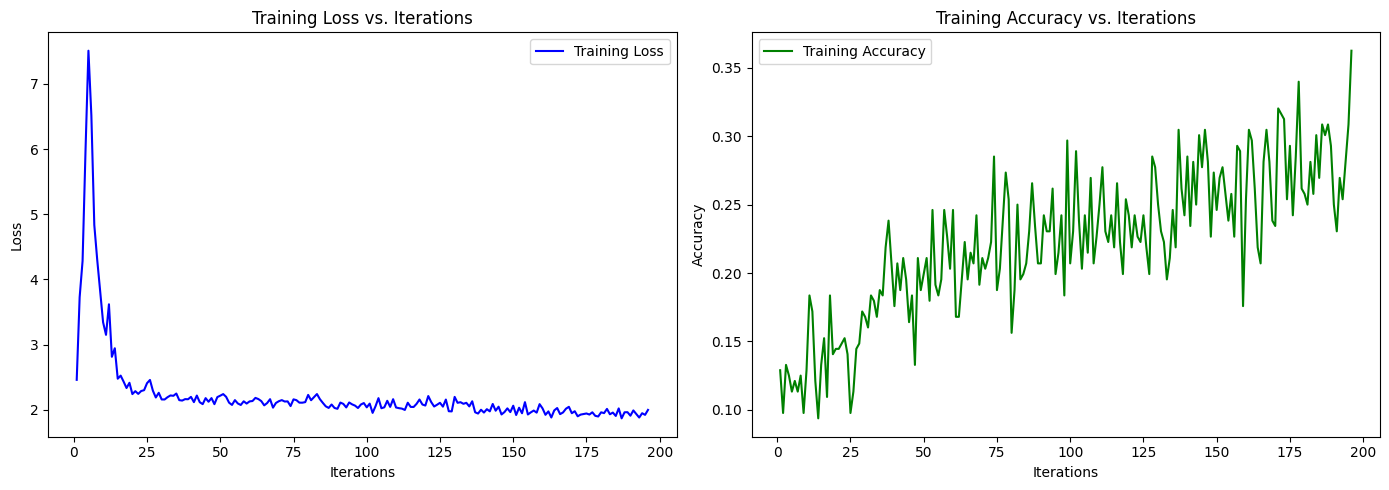

In [6]:
# Retrieve tracked metrics and plot them
metrics = model.get_metrics_per_iteration()
plot_metrics(metrics)

### Evaluating the Model on the Validation Set
Now that the model is trained, let's evaluate its performance on the validation (test) set to see how well it generalizes to unseen data.

In [7]:
# Define the loss function for evaluation
criterion = nn.CrossEntropyLoss()

# Evaluate the model on the validation set
evaluation_metrics = evaluate_model(model, val_loader, criterion, device)
print(f"Validation Loss: {evaluation_metrics['loss']:.4f}, Validation Accuracy: {evaluation_metrics['accuracy']:.4f}")

Evaluation - Loss: 1.9569, Accuracy: 0.2881
Validation Loss: 1.9569, Validation Accuracy: 0.2881


In [8]:
# Import necessary libraries
import torch
from models.mobinet import MoBiNet  # Import the MoBiNet model from your models folder

In [1]:
# Import necessary libraries
import torch
import torch.nn as nn

# Import MoBiNet and specific blocks from your implementation
from models.mobinet import MoBiNet
from models.layers import PreBlock, MidBlock, StandardDWBlock, PostBlock  # Ensure the correct import paths based on your project structure

# Set device to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define the input tensor shape for testing
input_tensor = torch.randn(1, 3, 224, 224).to(device)  # Dummy input with batch size 1

# Test MoBiNet with PreBlock repeated 4 times
print("Testing MoBiNet with PreBlock repeated 4 times...")
model_pre = MoBiNet(block_type=PreBlock, num_blocks=4, num_classes=10).to(device)
try:
    output_pre = model_pre(input_tensor)
    print(f"Output shape (PreBlock): {output_pre.shape}\n")
except Exception as e:
    print(f"Error during forward pass with PreBlock: {e}\n")

# Test MoBiNet with MidBlock repeated 4 times
print("Testing MoBiNet with MidBlock repeated 4 times...")
model_mid = MoBiNet(block_type=MidBlock, num_blocks=4, num_classes=10).to(device)
try:
    output_mid = model_mid(input_tensor)
    print(f"Output shape (MidBlock): {output_mid.shape}\n")
except Exception as e:
    print(f"Error during forward pass with MidBlock: {e}\n")

# Test MoBiNet with StandardDWBlock repeated 4 times
print("Testing MoBiNet with StandardDWBlock repeated 4 times...")
model_std = MoBiNet(block_type=StandardDWBlock, num_blocks=1, num_classes=10).to(device)
try:
    output_std = model_std(input_tensor)
    print(f"Output shape (StandardDWBlock): {output_std.shape}\n")
except Exception as e:
    print(f"Error during forward pass with StandardDWBlock: {e}\n")

# Test MoBiNet with PostBlock repeated 4 times
print("Testing MoBiNet with PostBlock repeated 4 times...")
model_post = MoBiNet(block_type=PostBlock, num_blocks=4, num_classes=10).to(device)
try:
    output_post = model_post(input_tensor)
    print(f"Output shape (PostBlock): {output_post.shape}\n")
except Exception as e:
    print(f"Error during forward pass with PostBlock: {e}\n")

Using device: cuda
Testing MoBiNet with PreBlock repeated 4 times...
Output shape (PreBlock): torch.Size([1, 10])

Testing MoBiNet with MidBlock repeated 4 times...
Output shape (MidBlock): torch.Size([1, 10])

Testing MoBiNet with StandardDWBlock repeated 4 times...
Output shape (StandardDWBlock): torch.Size([1, 10])

Testing MoBiNet with PostBlock repeated 4 times...
Output shape (PostBlock): torch.Size([1, 10])



Using device: cuda
Files already downloaded and verified
Files already downloaded and verified


/home/coder/miniconda3/envs/ml/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 1: Learning rate adjusted to 0.000995
Epoch 1/1 - Train Loss: 2.2518, Train Acc: 0.1478
Model saved to mobinet_model.pth.


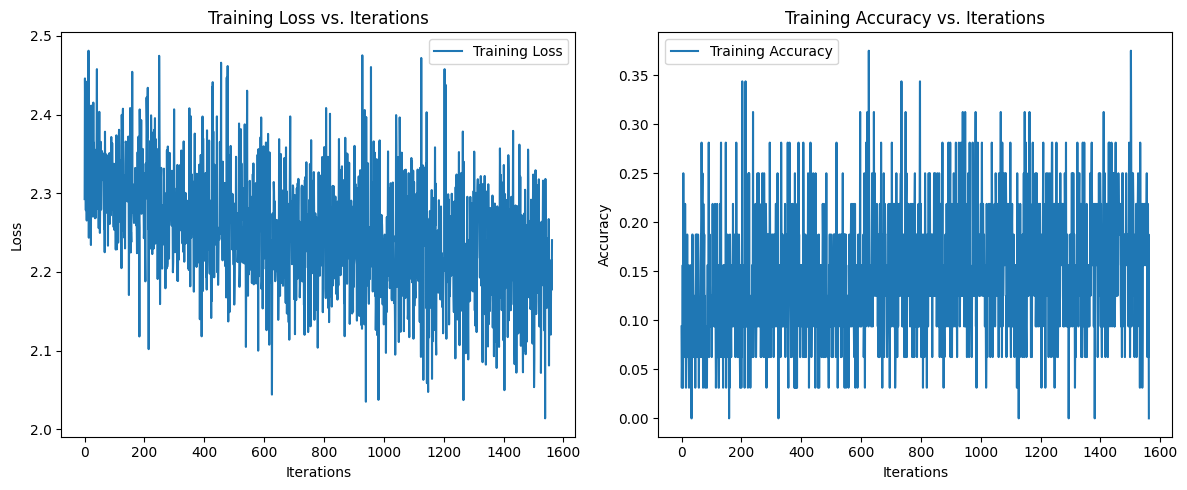

In [2]:
# Import necessary libraries
import torch
import torch.optim as optim
import torch.nn as nn

# Import your MoBiNet and blocks
from models.mobinet import MoBiNet
from models.layers import PreBlock, MidBlock, StandardDWBlock, PostBlock  # Make sure paths are correct based on your structure
from utils.training import train_model  # Import your train_model function
from utils.dataset import get_CIFAR_10  # Function to load CIFAR-10 data
from utils.visualization import plot_metrics  # To visualize training metrics

# Set device to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load CIFAR-10 dataset
train_loader, _ = get_CIFAR_10(batch_size=256, num_workers=8, augmentation='resnet')  # Adjust augmentation as needed

# Initialize MoBiNet with a specific block type (choose the block you want to test)
model = MoBiNet(block_type=MidBlock, num_blocks=1, num_classes=10).to(device)  # Replace MidBlock with desired block type

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.0001)

# Define learning rate scheduler (optional)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)  # Customize as needed

# Train the model
train_model(model, train_loader, criterion, optimizer, device, num_epochs=1, scheduler=scheduler, save_path='mobinet_model.pth')

# Visualize training metrics
metrics = model.get_metrics_per_iteration()
plot_metrics(metrics)

In [11]:
import torch
import torch.nn as nn
from models.resnet import resnet34  # Adjust based on your specific ResNet model (resnet34 or resnet50)
from utils.dataset import get_CIFAR_10  # Function to load CIFAR-10 data
from utils.evaluation import evaluate_model  # Import your evaluation function
from utils.training import load_checkpoint
import torch.optim as optim
# Set device to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load CIFAR-10 dataset (using validation loader)
_, val_loader = get_CIFAR_10(batch_size=256, num_workers=8, augmentation='resnet')  # Load validation data

# Initialize the ResNet model (same model architecture as the one used for training)
model = resnet34(num_classes=10).to(device)  # Adjust if you trained a different ResNet model like resnet50

# Load the trained model weights
# model.load_state_dict(torch.load('resnet18_model.pth'))
# model.to(device)
# print("Model loaded successfully from 'resnet_model.pth'.")
# Assuming `model` and `optimizer` are already defined
optimizer = optim.SGD(model.parameters(), lr=0.01,
                      momentum=0.9, weight_decay=5e-4)
# model, optimizer, epoch, best_val_accuracy = load_checkpoint('resnet34_model.pth', model, optimizer)
model.load_state_dict(torch.load('resnet34_model.pth'))
# Define the loss function (same as used during training)
criterion = nn.CrossEntropyLoss()

# Evaluate the loaded model on the validation set
evaluation_results = evaluate_model(model, val_loader, criterion, device)

# Print the evaluation results
print(f"Validation Loss: {evaluation_results['loss']:.4f}")
print(f"Validation Accuracy: {evaluation_results['accuracy'] * 100:.2f}%")

Using device: cuda
Files already downloaded and verified
Files already downloaded and verified
Evaluation - Loss: 0.3847, Accuracy: 0.8717
Validation Loss: 0.3847
Validation Accuracy: 87.17%


'./Mobile_Neural_Network_Outline.png'

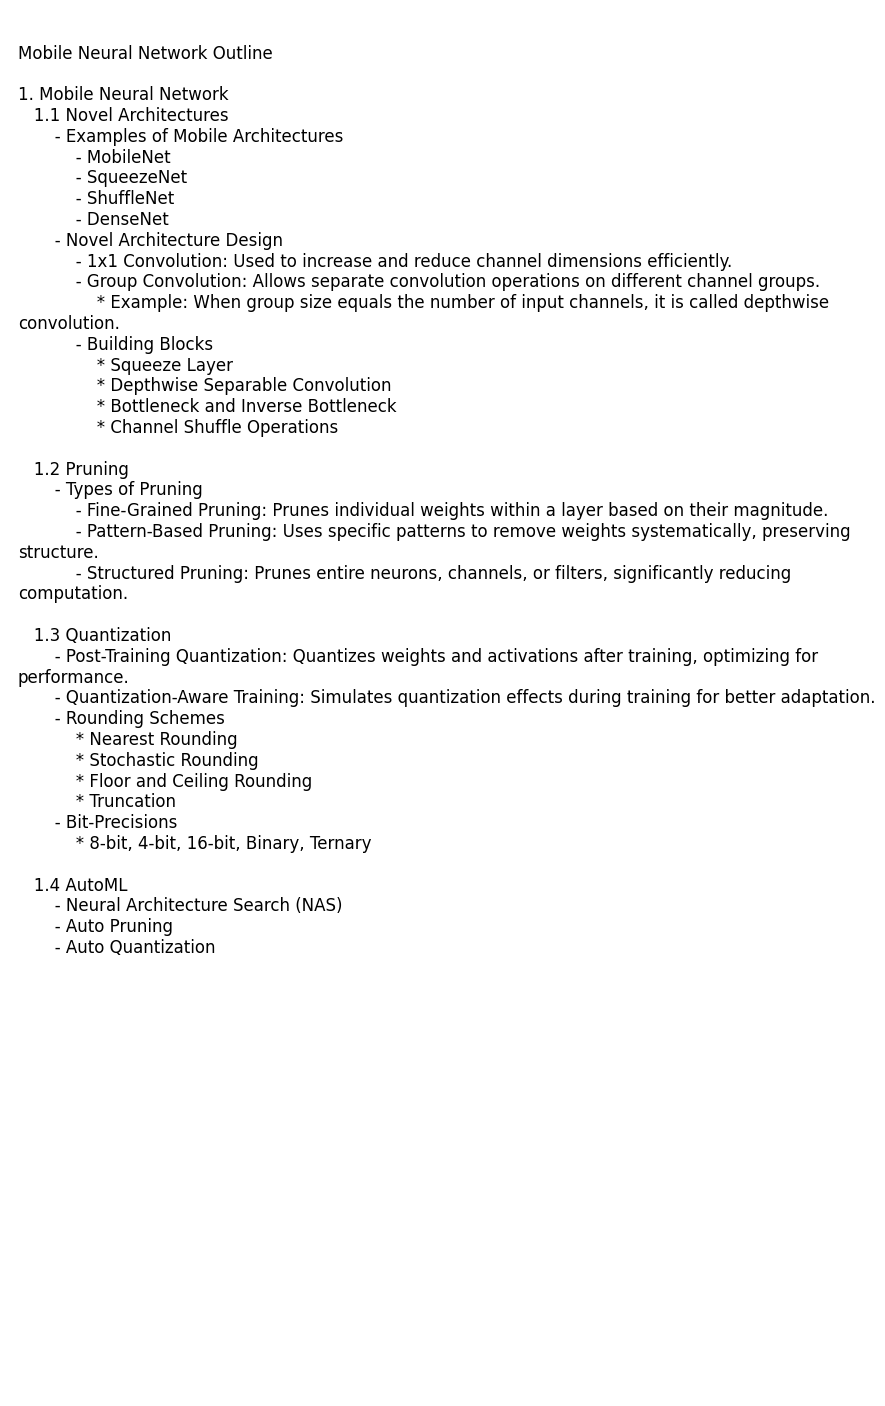

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Creating the figure and axis
plt.figure(figsize=(12, 20))
plt.axis('off')

# Define the outline text for visualization with improved formatting
outline_text = """
Mobile Neural Network Outline

1. Mobile Neural Network
   1.1 Novel Architectures
       • Examples of Mobile Architectures:
           ◦ MobileNet
           ◦ SqueezeNet
           ◦ ShuffleNet
           ◦ DenseNet
       • Novel Architecture Design:
           ◦ 1x1 Convolution: Efficiently increases or reduces channel dimensions.
           ◦ Group Convolution: Allows separate convolutions across different channel groups.
               - Example: When group size equals the number of input channels, it is called depthwise convolution.
           • Building Blocks:
               ◦ Squeeze Layer
               ◦ Depthwise Separable Convolution
               ◦ Bottleneck and Inverse Bottleneck
               ◦ Channel Shuffle Operations

   1.2 Pruning
       • Types of Pruning:
           ◦ Fine-Grained Pruning: Prunes individual weights based on magnitude.
           ◦ Pattern-Based Pruning: Removes weights using specific patterns while maintaining structure.
           ◦ Structured Pruning: Prunes neurons, channels, or filters to reduce computation.

   1.3 Quantization
       • Post-Training Quantization: Optimizes performance by quantizing weights and activations after training.
       • Quantization-Aware Training: Simulates quantization effects during training to maintain accuracy.
       • Rounding Schemes:
           ◦ Nearest Rounding
           ◦ Stochastic Rounding
           ◦ Floor and Ceiling Rounding
           ◦ Truncation
       • Bit-Precisions:
           ◦ 8-bit, 4-bit, 16-bit, Binary, Ternary

   1.4 AutoML
       • Neural Architecture Search (NAS)
       • Auto Pruning
       • Auto Quantization
"""

# Setting up a background box for improved visual style
background = FancyBboxPatch((0, 0), 1, 1, boxstyle="round,pad=0.3", edgecolor='lightblue', facecolor='whitesmoke', linewidth=2, transform=plt.gca().transAxes)

# Adding the text with style enhancements
plt.gca().add_patch(background)
plt.text(0.02, 0.98, outline_text, ha='left', va='top', fontsize=12, family='monospace', wrap=True, color='darkblue')

# Save the improved image
output_image_path = "Enhanced_Mobile_Neural_Network_Outline.png"
plt.savefig(output_image_path, bbox_inches='tight', pad_inches=1, dpi=300)

plt.show()
